In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('online_courses_uses.csv')

In [3]:
data.head()

,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5)
0,1,Course_1,Office Tools,21,4217,50.646827,Coursera,38.797425,4.811252
1,2,Course_2,Office Tools,57,4238,82.240240,edX,160.650991,3.829329
2,3,Course_3,Technology,52,2700,55.729028,LinkedIn Learning,123.503781,4.851950
3,4,Course_4,Office Tools,69,4308,58.664729,LinkedIn Learning,116.775704,3.913732
4,5,Course_5,Technology,43,4792,62.598147,Udemy,96.246696,4.921968


In [4]:
data.tail()

,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5)
9995,9996,Course_9996,AI,87,482,55.407463,Udemy,155.965331,4.155649
9996,9997,Course_9997,Data Science,96,2029,93.093483,Coursera,151.022434,4.037755
9997,9998,Course_9998,AI,25,136,90.279510,LinkedIn Learning,101.155089,3.603868
9998,9999,Course_9999,Programming,46,3258,73.720149,edX,101.143232,3.825781
9999,10000,Course_10000,Programming,50,257,71.381890,Udemy,125.116906,3.767038


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course_ID            10000 non-null  int64  
 1   Course_Name          10000 non-null  object 
 2   Category             10000 non-null  object 
 3   Duration (hours)     10000 non-null  int64  
 4   Enrolled_Students    10000 non-null  int64  
 5   Completion_Rate (%)  10000 non-null  float64
 6   Platform             10000 non-null  object 
 7   Price ($)            10000 non-null  float64
 8   Rating (out of 5)    10000 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 703.2+ KB


In [6]:
data.isnull().sum()

,0
Course_ID,0
Course_Name,0
Category,0
Duration (hours),0
Enrolled_Students,0
Completion_Rate (%),0
Platform,0
Price ($),0
Rating (out of 5),0


# ***Graphics***

# **1**

In [7]:
data['Category'].unique()

array(['Office Tools', 'Technology', 'Finance', 'Marketing', 'Design',
       'Programming', 'Data Science', 'Business', 'AI'], dtype=object)

In [8]:
race = data['Category'].value_counts()
race

,count
Category,
Business,1148
Office Tools,1139
Marketing,1126
Finance,1124
Design,1112
AI,1104
Data Science,1098
Programming,1076
Technology,1073


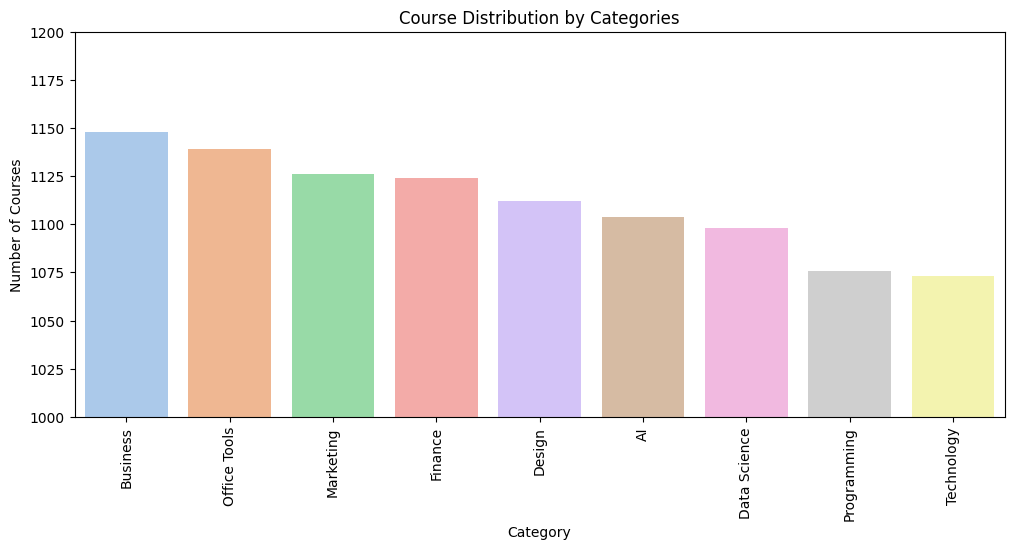

In [9]:
plt.figure(figsize=(12,5))
sns.barplot(x= race.index, y=race.values, palette='pastel')

plt.title('Course Distribution by Categories')
plt.xlabel('Category')
plt.ylabel('Number of Courses')

plt.ylim(1000,1200)
plt.xticks(rotation=90)

plt.show()

# **2**

In [10]:
data['Platform'].unique()

array(['Coursera', 'edX', 'LinkedIn Learning', 'Udemy'], dtype=object)

In [11]:
price_df = data.groupby(['Category', 'Platform'])['Price ($)'].mean().reset_index()
price_df

,Category,Platform,Price ($)
0,AI,Coursera,107.612500
1,AI,LinkedIn Learning,102.411609
2,AI,Udemy,109.527690
3,AI,edX,99.751104
4,Business,Coursera,103.354342
5,Business,LinkedIn Learning,102.464128
6,Business,Udemy,106.235942
7,Business,edX,97.047522
8,Data Science,Coursera,115.305024
9,Data Science,LinkedIn Learning,104.772839


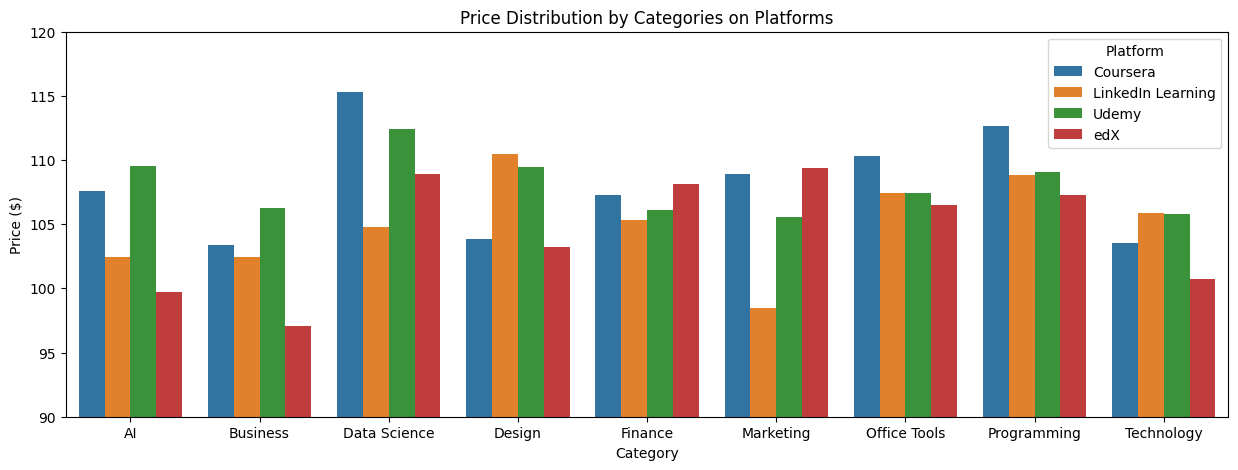

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x='Category', y='Price ($)',hue='Platform', data=price_df)

plt.title('Price Distribution by Categories on Platforms')
plt.xlabel('Category')
plt.ylabel('Price ($)')

plt.ylim(90,120)
plt.show()

# **3**

In [13]:
enrolled_df = data.groupby('Platform')['Enrolled_Students'].agg('sum').sort_values(ascending=True)
enrolled_df

,Enrolled_Students
Platform,
Coursera,6212505
edX,6232148
LinkedIn Learning,6323600
Udemy,6538277


In [14]:
px.pie(names=enrolled_df.index, values=enrolled_df.values, title='Student Distribution by Platforms')

# **4**

In [15]:
df = data.groupby('Category')['Completion_Rate (%)'].mean().reset_index()
df

,Category,Completion_Rate (%)
0,AI,75.011716
1,Business,74.972451
2,Data Science,75.343010
3,Design,75.429409
4,Finance,75.235829
5,Marketing,74.691278
6,Office Tools,74.641310
7,Programming,75.632548
8,Technology,75.160604


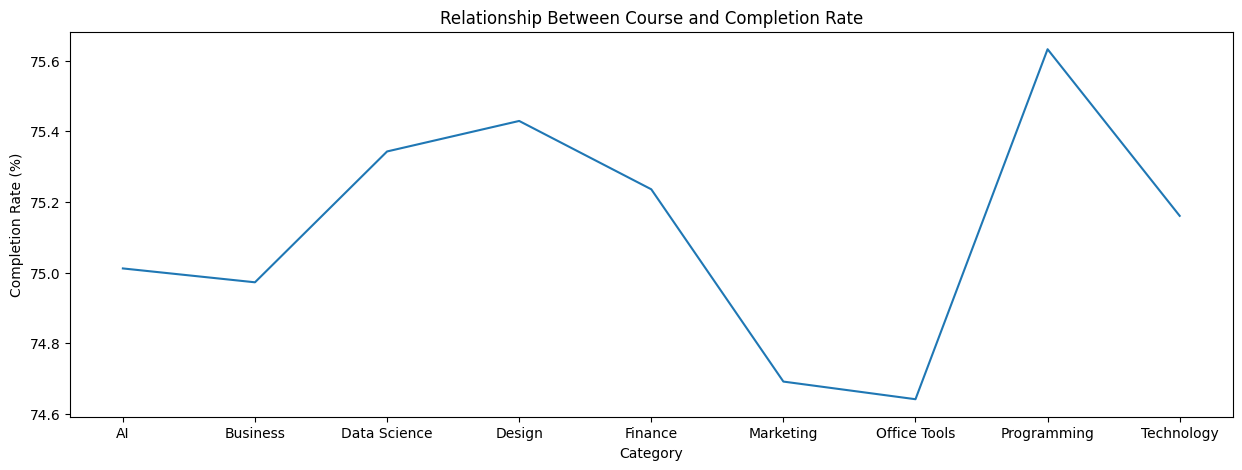

In [16]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Category', y='Completion_Rate (%)', data=df)

plt.title('Relationship Between Course and Completion Rate')
plt.xlabel('Category')
plt.ylabel('Completion Rate (%)')

plt.show()

# **5**

In [17]:
rating_df = data.groupby('Platform')['Rating (out of 5)'].mean().reset_index()
rating_df

,Platform,Rating (out of 5)
0,Coursera,3.999942
1,LinkedIn Learning,3.973175
2,Udemy,3.999519
3,edX,4.004033


In [18]:
comp_df = data.groupby('Platform')['Completion_Rate (%)'].mean().reset_index()
comp_df

,Platform,Completion_Rate (%)
0,Coursera,74.963258
1,LinkedIn Learning,75.080557
2,Udemy,75.098761
3,edX,75.336501


Text(0.5, 1.0, 'Relationship Between Completion Rate and Rating')

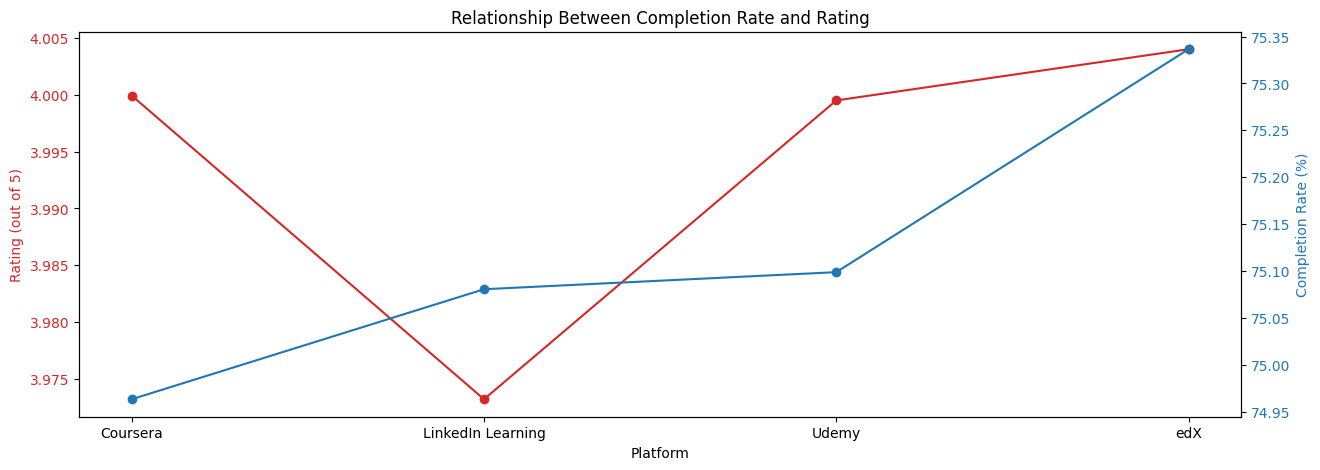

In [19]:
fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:red'
ax1.set_xlabel('Platform')
ax1.set_ylabel('Rating (out of 5)', color=color)
ax1.plot(rating_df['Platform'], rating_df['Rating (out of 5)'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Completion Rate (%)', color=color)
ax2.plot(comp_df['Platform'], comp_df['Completion_Rate (%)'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Relationship Between Completion Rate and Rating')

# **6**

In [20]:
rating_df = data.groupby(['Category', 'Platform'])['Rating (out of 5)'].mean().reset_index()
rating_df


,Category,Platform,Rating (out of 5)
0,AI,Coursera,4.007453
1,AI,LinkedIn Learning,3.964293
2,AI,Udemy,3.986911
3,AI,edX,3.972266
4,Business,Coursera,4.010598
5,Business,LinkedIn Learning,4.004025
6,Business,Udemy,3.981188
7,Business,edX,3.971572
8,Data Science,Coursera,4.018455
9,Data Science,LinkedIn Learning,4.006718


In [21]:
fig = px.bar(rating_df, x='Category', y='Rating (out of 5)', color='Platform', barmode='group', title='Relationship Between Course and Rating')

fig.update_yaxes(range=[3.8, 4.1])

# **7**

In [22]:
price_df = data.groupby('Category')['Price ($)'].mean()
price_df

,Price ($)
Category,
AI,104.695098
Business,102.499106
Data Science,110.170669
Design,106.717894
Finance,106.771382
Marketing,105.380775
Office Tools,107.981911
Programming,109.475623
Technology,103.976057


In [23]:
student_df = data.groupby('Category')['Enrolled_Students'].mean()
student_df

,Enrolled_Students
Category,
AI,2545.171196
Business,2481.339721
Data Science,2490.715847
Design,2503.144784
Finance,2573.342527
Marketing,2619.660746
Office Tools,2530.915716
Programming,2487.545539
Technology,2542.677540


Text(0.5, 1.0, 'Relationship between enrolled student and price')

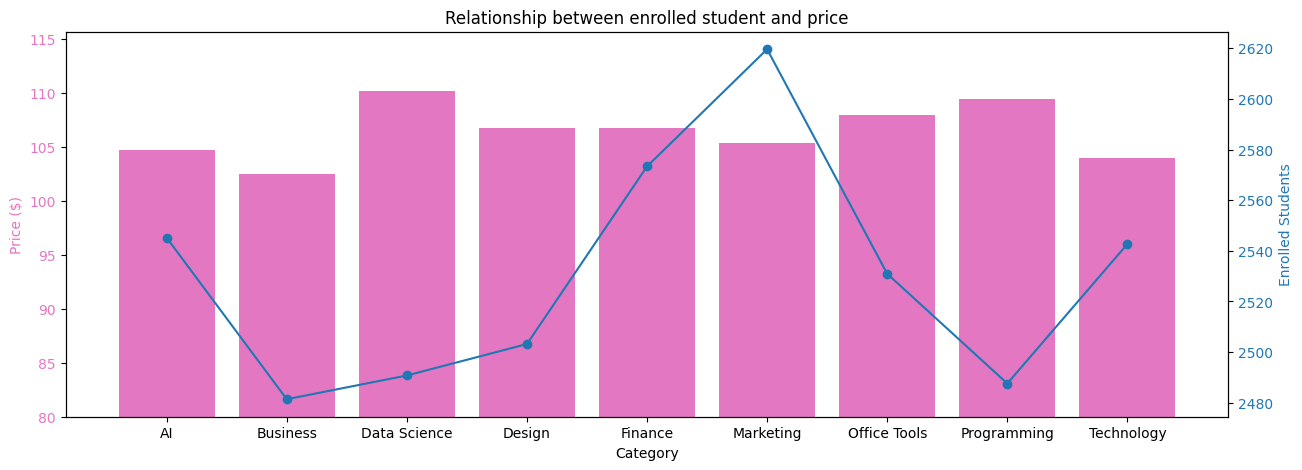

In [24]:
fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:pink'
ax1.set_xlabel('Category')
ax1.set_ylabel('Price ($)', color=color)
ax1.bar(price_df.index, price_df.values, color=color)
ax1.set_ylim(80, ax1.get_ylim()[1])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Enrolled Students', color=color)
ax2.plot(student_df.index, student_df.values, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Relationship between enrolled student and price')


# **8**

In [25]:
duration_df = data.groupby(['Category'])['Duration (hours)'].mean().reset_index()
duration_df

,Category,Duration (hours)
0,AI,55.444746
1,Business,55.134146
2,Data Science,54.327869
3,Design,55.480216
4,Finance,56.183274
5,Marketing,55.204263
6,Office Tools,55.831431
7,Programming,53.143123
8,Technology,55.456664


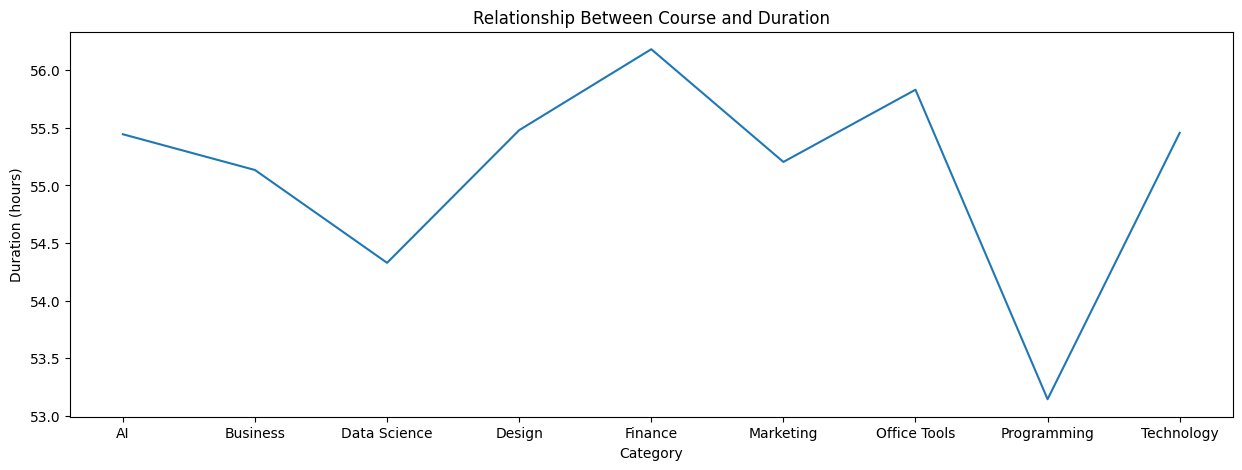

In [26]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Category', y='Duration (hours)', data=duration_df)

plt.title('Relationship Between Course and Duration')
plt.xlabel('Category')
plt.ylabel('Duration (hours)')

plt.show()

# **9**

In [27]:
sumDur_df = data.groupby(['Platform', 'Category'])['Duration (hours)'].agg('sum').reset_index()
sumDur_df

,Platform,Category,Duration (hours)
0,Coursera,AI,14841
1,Coursera,Business,15601
2,Coursera,Data Science,13525
3,Coursera,Design,15485
4,Coursera,Finance,15447
5,Coursera,Marketing,14465
6,Coursera,Office Tools,16452
7,Coursera,Programming,14645
8,Coursera,Technology,13897
9,LinkedIn Learning,AI,16226


In [28]:
px.bar(sumDur_df, x='Platform', y='Duration (hours)', color='Category', barmode='group', title='The Total Duration of Courses in Platform')

# **10**

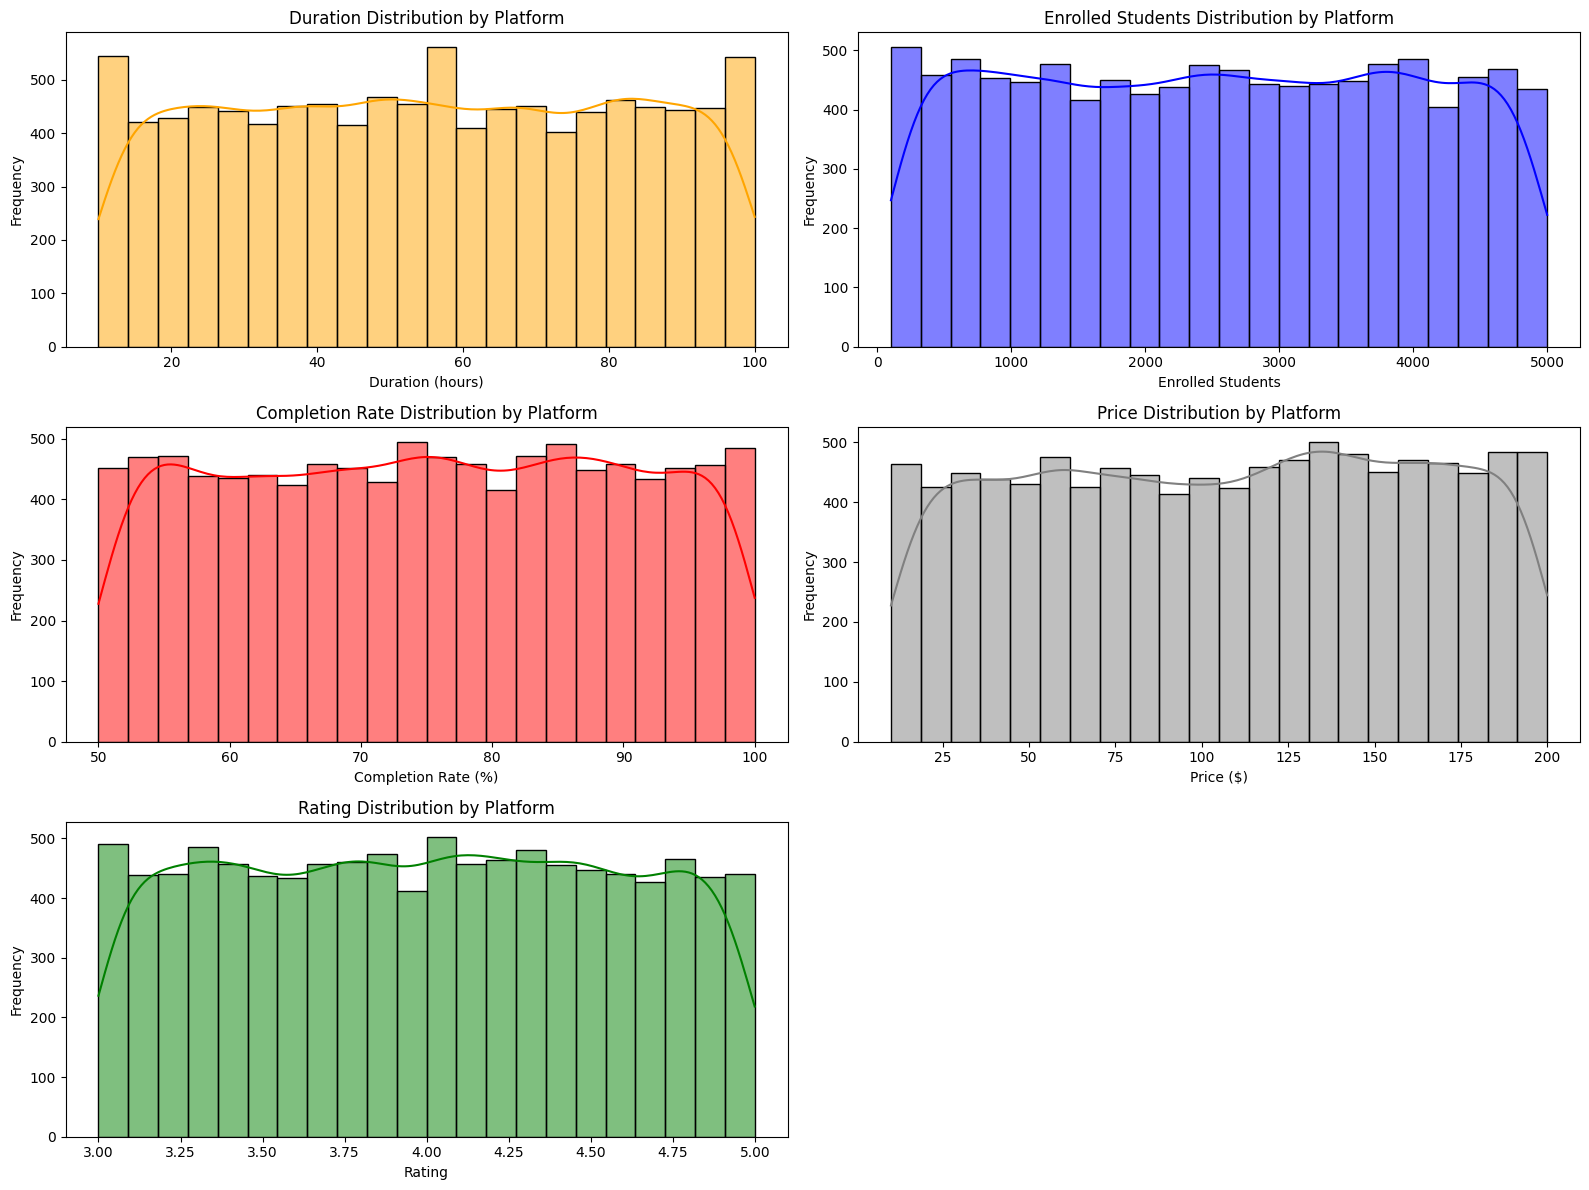

In [29]:
plt.figure(figsize=(16, 12))

# for duration
plt.subplot(3, 2, 1)
sns.histplot(data=data, x='Duration (hours)', multiple='stack', color='orange',kde=True)
plt.title('Duration Distribution by Platform')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')

# for enrolled students
plt.subplot(3, 2, 2)
sns.histplot(data=data, x='Enrolled_Students', multiple='stack', color='blue',kde=True)
plt.title('Enrolled Students Distribution by Platform')
plt.xlabel('Enrolled Students')
plt.ylabel('Frequency')

# for completion rate
plt.subplot(3, 2, 3)
sns.histplot(data=data, x='Completion_Rate (%)', multiple='stack', color='red',kde=True)
plt.title('Completion Rate Distribution by Platform')
plt.xlabel('Completion Rate (%)')
plt.ylabel('Frequency')

# for price
plt.subplot(3, 2, 4)
sns.histplot(data=data, x='Price ($)', multiple='stack', color='gray',kde=True)
plt.title('Price Distribution by Platform')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

# for rating
plt.subplot(3, 2, 5)
sns.histplot(data=data, x='Rating (out of 5)', multiple='stack', color='green',kde=True)
plt.title('Rating Distribution by Platform')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# ***Machine Learning***

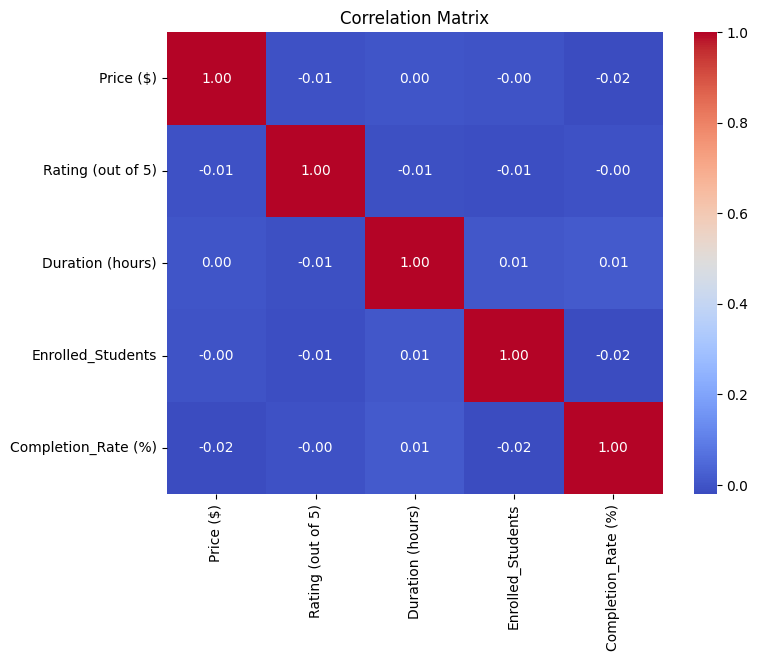

In [30]:
selected_columns = data[['Price ($)', 'Rating (out of 5)', 'Duration (hours)', 'Enrolled_Students', 'Completion_Rate (%)']]

# Calculating the correlation matrix
correlation_matrix = selected_columns.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [31]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [32]:
data.head()

,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5)
0,1,Course_1,Office Tools,21,4217,50.646827,Coursera,38.797425,4.811252
1,2,Course_2,Office Tools,57,4238,82.240240,edX,160.650991,3.829329
2,3,Course_3,Technology,52,2700,55.729028,LinkedIn Learning,123.503781,4.851950
3,4,Course_4,Office Tools,69,4308,58.664729,LinkedIn Learning,116.775704,3.913732
4,5,Course_5,Technology,43,4792,62.598147,Udemy,96.246696,4.921968


In [33]:
# Remove unrelated columns

data_copy = data.drop(['Course_ID', 'Course_Name'], axis=1)
data_copy

,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5)
0,Office Tools,21,4217,50.646827,Coursera,38.797425,4.811252
1,Office Tools,57,4238,82.240240,edX,160.650991,3.829329
2,Technology,52,2700,55.729028,LinkedIn Learning,123.503781,4.851950
3,Office Tools,69,4308,58.664729,LinkedIn Learning,116.775704,3.913732
4,Technology,43,4792,62.598147,Udemy,96.246696,4.921968
...,...,...,...,...,...,...,...
9995,AI,87,482,55.407463,Udemy,155.965331,4.155649
9996,Data Science,96,2029,93.093483,Coursera,151.022434,4.037755
9997,AI,25,136,90.279510,LinkedIn Learning,101.155089,3.603868
9998,Programming,46,3258,73.720149,edX,101.143232,3.825781


In [34]:
# Converting categorical variables to numerical data
one_hot_encoded_data = pd.get_dummies(data_copy, columns = ['Category','Platform'])

# 0 and 1 instead of true and false
one_hot_encoded_data.replace({False: 0, True: 1}, inplace=True)
one_hot_encoded_data

,Duration (hours),Enrolled_Students,Completion_Rate (%),Price ($),Rating (out of 5),Category_AI,Category_Business,Category_Data Science,Category_Design,Category_Finance,Category_Marketing,Category_Office Tools,Category_Programming,Category_Technology,Platform_Coursera,Platform_LinkedIn Learning,Platform_Udemy,Platform_edX
0,21,4217,50.646827,38.797425,4.811252,0,0,0,0,0,0,1,0,0,1,0,0,0
1,57,4238,82.240240,160.650991,3.829329,0,0,0,0,0,0,1,0,0,0,0,0,1
2,52,2700,55.729028,123.503781,4.851950,0,0,0,0,0,0,0,0,1,0,1,0,0
3,69,4308,58.664729,116.775704,3.913732,0,0,0,0,0,0,1,0,0,0,1,0,0
4,43,4792,62.598147,96.246696,4.921968,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,87,482,55.407463,155.965331,4.155649,1,0,0,0,0,0,0,0,0,0,0,1,0
9996,96,2029,93.093483,151.022434,4.037755,0,0,1,0,0,0,0,0,0,1,0,0,0
9997,25,136,90.279510,101.155089,3.603868,1,0,0,0,0,0,0,0,0,0,1,0,0
9998,46,3258,73.720149,101.143232,3.825781,0,0,0,0,0,0,0,1,0,0,0,0,1


In [35]:
# The target variable is separated
X = one_hot_encoded_data.drop("Price ($)",axis=1)
y = one_hot_encoded_data["Price ($)"]

In [36]:
X.head()

,Duration (hours),Enrolled_Students,Completion_Rate (%),Rating (out of 5),Category_AI,Category_Business,Category_Data Science,Category_Design,Category_Finance,Category_Marketing,Category_Office Tools,Category_Programming,Category_Technology,Platform_Coursera,Platform_LinkedIn Learning,Platform_Udemy,Platform_edX
0,21,4217,50.646827,4.811252,0,0,0,0,0,0,1,0,0,1,0,0,0
1,57,4238,82.240240,3.829329,0,0,0,0,0,0,1,0,0,0,0,0,1
2,52,2700,55.729028,4.851950,0,0,0,0,0,0,0,0,1,0,1,0,0
3,69,4308,58.664729,3.913732,0,0,0,0,0,0,1,0,0,0,1,0,0
4,43,4792,62.598147,4.921968,0,0,0,0,0,0,0,0,1,0,0,1,0


In [37]:
# Splitting the dataset into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [38]:
# Standardization of data
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [39]:
# Creating a linear regression model and training it on the training set
linReg = LinearRegression()
linReg_model = linReg.fit(X_train,y_train)

In [40]:
# Estimation of target variable
y_pred = linReg_model.predict(X_test)

In [41]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
print(mae)

48.0653117764202
